In [22]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statistics
from scipy.integrate import solve_ivp

In [23]:
# I Deriving PCA from the SVD 
df = pd.read_csv('ovarian_cancer.csv')

In [32]:
#1. Implement principal component analysis for an arbitrary dataset: 
#.  you may use an implementation of the singular value decomposition.

#function to compute pca
def PCA(data):
    xmean = data.mean(axis=1)                                #mean of each row
    xbar = xmean * np.ones((1, data.shape[1]))               #avg matrix
    matrixB = data - xbar                                    #Subtract data
    U, S, VT = np.linalg.svd(matrixB, full_matrices = False) #SVD decomp on matrix B
    S = np.diag(S)                                           #Singular values from S to construct a diag matrix S
    T = np.matmul(U,S)                                       #principle component mat
    return T,S                                               #return compoment matrix T and Sigma from svd decomp

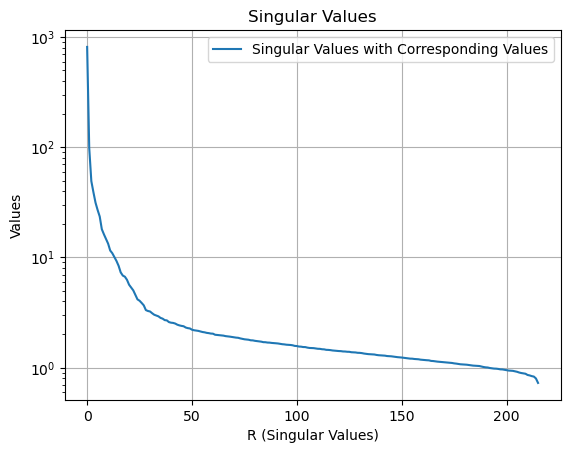

In [33]:
#2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. 
#.  Plot singular values and plot the fraction of variance corresponding to each singular value. 

ov_df = df.drop(columns = ['status','patients']) #take out features
ov_df = np.mat(ov_df)                            #data set not workable with our function -- need to transform in to matrix
T, S = PCA(ov_df)                                #use the function

plt.semilogy(np.diag(S));                        #plot function Singular Values
plt.grid();
plt.xlabel('R (Singular Values)');
plt.ylabel('Values');
plt.legend(['Singular Values with Corresponding Values']);
plt.title("Singular Values");

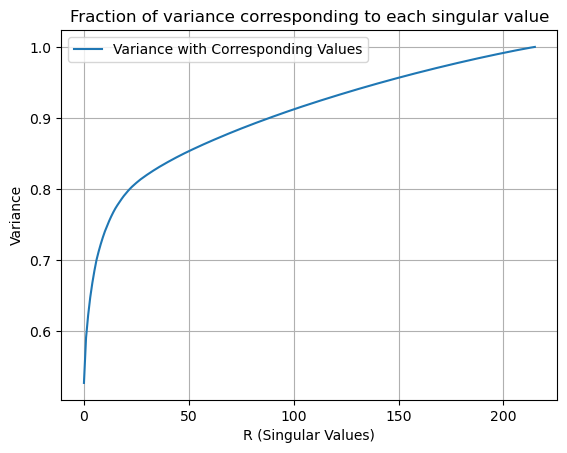

In [26]:
#plot fraction of variance corresponding to each singular value (Figure 2)

plt.plot( np.cumsum(np.diag(S) / np.sum(np.diag(S))) );
plt.title('Fraction of variance corresponding to each singular value');
plt.xlabel('R (Singular Values)');
plt.ylabel('Variance');
plt.legend(['Variance with Corresponding Values']);
plt.grid()

In [27]:
#3. Find the two first principal components. Note that the ith principal component is calculated by: 
T = pd.DataFrame(T)
T = pd.concat([df[['status','patients']], T], axis = 1)
#plt.scatter(T,S)


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [28]:
T

,status,patients,0,1,2,3,4,5,6,7,...,206,207,208,209,210,211,212,213,214,215
0,Cancer,P0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cancer,P1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cancer,P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cancer,P3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cancer,P4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Normal,P211,-63.889647,0.233541,-5.882227,0.148150,-2.630822,2.221830,0.257243,-1.247782,...,0.130215,-0.036577,0.109153,0.011202,0.366815,-0.025647,-0.418916,-0.294877,0.027927,-0.005259
212,Normal,P212,-57.950381,-2.408729,-2.117514,0.572129,-2.157749,3.293429,-1.114645,-0.558381,...,0.005438,-0.077837,-0.040803,0.073051,0.003818,-0.079858,0.038850,-0.030132,-0.009375,-0.023087
213,Normal,P213,-55.601224,-2.659601,-6.574176,-0.497762,0.857657,0.926681,0.087169,-0.542954,...,-0.087114,-0.122624,-0.165184,-0.045762,-0.008011,0.036786,-0.052909,-0.036912,0.021628,-0.000740
214,Normal,P214,-58.766746,-1.608157,-7.750155,-0.243715,-0.282505,1.503996,-1.049640,-0.724637,...,0.119998,0.240604,0.033562,0.077831,-0.006606,0.013520,0.134812,0.100836,0.024488,0.134715


In [8]:
# II Signal decomposition.

#Question 1
#Download mixed_signals.csv from Canvas.

df_2 = pd.read_csv('mixed_signals.csv')                      #Load Data Set 
mix_sig = df_2.drop(columns = ['Unnamed: 0'],inplace = True) #take out features

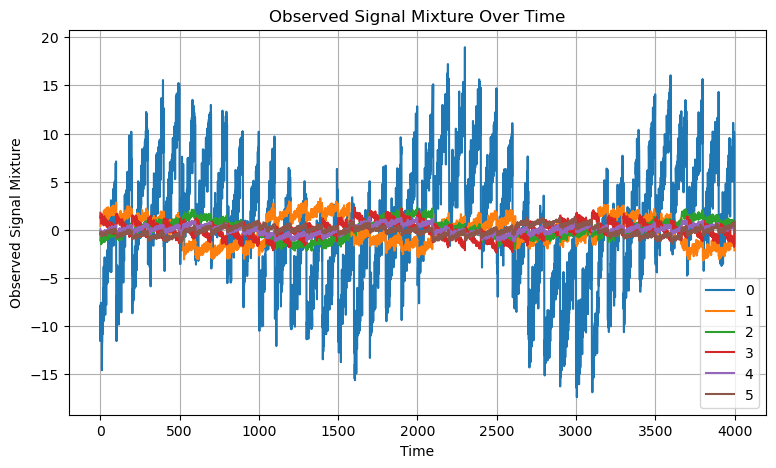

In [9]:
#mix_signal plot
#The rows represent time and the columns correspond to an observed signal mixture. 
#Plot each signal over time.

df_2.plot(figsize=(9, 5));
plt.grid();
plt.xlabel('Time');
plt.ylabel('Observed Signal Mixture');
plt.title('Observed Signal Mixture Over Time');

In [18]:
#2. Recover unobserved source signals from observed mixed signals.  
   #You may use methods such as ICA, PCA, and other dimensionality reduction algorithms.  
   #Plot recovered source signals over time. Compare other results to PCA and discuss.


from sklearn.decomposition import FastICA



In [11]:
#3.  Write down the equations for each of the recovered source signals.  These are known mathematical functions. 